In [1]:
setwd('/media/sf_Box_Sync/Hyperlactemia sepsis project_jinghe/Data/')
library(plyr)

#patients with infection and organ dysfunction
load('data_df2.1.RData')

print('#the lactate tests for patients with infection and organ dysfunction')
head(data_df2.1)

##select patients with at least one lactate > 4 mmol/L
selectPt <- function(data) {
    num <- nrow(data[data$valuenum>4,])
    return(num)
}
data_df2.1 <- data_df2.1[order(data_df2.1$id, data_df2.1$charttime),]
data_df2.id2 <- ddply(data_df2.1, .(id), selectPt)
length(unique(data_df2.1$id)) #4,235
data_df2.ptid <- data_df2.id2$id[data_df2.id2$V1>0]
length(data_df2.ptid) #1,221


[1] "#the lactate tests for patients with infection and organ dysfunction"


,id,charttime,itemid,valuenum
12795469,25904#%#1#%#1,2500-08-27 01:21:00,818,3.1
12795470,25904#%#1#%#1,2500-08-27 01:21:00,1531,3.1
4054162,25904#%#1#%#1,2500-08-27 02:21:00,50010,3.1
12795492,25904#%#1#%#1,2500-08-27 03:25:00,818,2.8
12795493,25904#%#1#%#1,2500-08-27 03:25:00,1531,2.8
4054170,25904#%#1#%#1,2500-08-27 04:25:00,50010,2.8


[1] 4235

[1] 1221

In [ ]:
# select the patients with at least one lactate > 4mmol/L
data_df2.2 <- data_df2.1[data_df2.1$id %in% data_df2.ptid,]
data_df2.2 <- data_df2.2[order(data_df2.2$id, data_df2.2$charttime),]


In [2]:
#get the time of severe sepsis for each patient

sepsis.time <- function(data) {
  event.time <- NA
  clear.time <- NA
  normalize.time <- NA
  lastlactate.time <- data$charttime[nrow(data)]
  ind <- NA
  if (nrow(data) < 1) {
    times <- c(event.time, clear.time, normalize.time, lastlactate.time)
    return(times)   
  } 
  else {
    event.time <- data$charttime[data$valuenum > 4][1]
    initial.lactate <- data$valuenum[data$valuenum > 4][1]
    ind <- which(data$valuenum > 4)[1]
    if (!is.na(ind) &(ind < nrow(data))) {
      data1 <- data[(ind:nrow(data)),]
      clear.time <- data1$charttime[(data1$valuenum <= initial.lactate*0.9)][1]
      normalize.time <- data1$charttime[data1$valuenum <= 2.5][1]
    }
#    init <- c(initial.lactate)
    times <- c(event.time, clear.time, normalize.time, lastlactate.time)
    return(times)   
  }
}


df2_times <- ddply(data_df2.2, .(id), sepsis.time)
names(df2_times) <- c('id', 'event.time', 'clear.time', 'normalize.time', 'lastlactate.time')

df2_times[1:20,]



,id,event.time,clear.time,normalize.time,lastlactate.time
1,1000#%#1#%#1,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00
2,10019#%#1#%#1,2675-05-29 16:07:00,NA,NA,2675-05-30 15:20:00
3,1003#%#1#%#1,3235-02-14 11:01:00,3235-02-17 06:18:00,NA,3235-02-17 06:18:00
4,10045#%#1#%#1,2579-11-05 06:53:00,2579-11-05 08:40:00,2579-11-06 22:54:00,2579-11-10 16:33:00
5,10061#%#1#%#1,3433-02-11 18:08:00,3433-02-12 08:06:00,3433-02-16 08:01:00,3433-03-02 23:35:00
6,10063#%#1#%#1,3413-09-06 21:50:00,3413-09-08 00:10:00,3413-09-08 00:10:00,3413-09-08 01:10:00
7,101#%#1#%#1,3046-11-16 14:38:00,3046-11-17 00:24:00,3046-11-17 22:39:00,3046-11-23 00:40:00
8,10126#%#1#%#1,3377-06-13 11:21:00,3377-06-13 13:33:00,3377-06-20 13:10:00,3377-07-18 14:33:00
9,10138#%#1#%#1,2807-03-03 17:59:00,2807-03-03 19:30:00,2807-03-04 10:02:00,2807-03-05 23:49:00
10,10160#%#2#%#2,3186-09-23 12:02:00,NA,NA,3186-09-25 01:21:00


In [3]:
load('infectdysfun.id.RData')

In [4]:
ids <- t(data.frame((strsplit(infectdysfun.id, '#%#'))))
write.csv(ids, file='infectdysfun_ids.csv', row.names=F)

In [5]:
#get the antibiotics data of those patients
antibiotics <- read.csv("infectdysfunc_antibiotics.csv")

antibiotics$id <- paste(antibiotics$subject_id, antibiotics$hospital_seq, antibiotics$icustay_seq, sep='#%#')
antibiotics2 <- data.frame(antibiotics$id, antibiotics$start_dt, antibiotics$stop_dt, antibiotics$drug)
names(antibiotics2) <- c('id', 'start_time', 'stop_time', 'itemid')
antibiotics2 <- antibiotics2[(antibiotics2$itemid != 'Meropenem Desensitization') & (antibiotics2$itemid != 'Hepatitis B Immune Globulin (Nabi-HB)'), ]
#merge antibiotics with severe sepsis time

sepsis.time <- df2_times
antibiotics3 <- merge(antibiotics2, sepsis.time, by.x = 'id', by.y = 'id', all.y = T)
# antibiotics3$start_time <- ymd_hms(antibiotics3$start_time)
# antibiotics3$stop_time <- ymd_hms(antibiotics3$stop_time)
antibiotics3$dftime <- difftime(antibiotics3$start_time, antibiotics3$event.time, units = 'hours')
length(unique(antibiotics3$itemid))
length(unique(antibiotics3$id))
names(antibiotics3)

antibiotics3 <- antibiotics3[order(antibiotics3$id, antibiotics3$dftime),]
unique(antibiotics3$itemid)
abx.types <- unique(antibiotics3$itemid)
head(antibiotics3)




[1] 52

[1] 1221

[1] "id"               "start_time"       "stop_time"        "itemid"          
[5] "event.time"       "clear.time"       "normalize.time"   "lastlactate.time"
[9] "dftime"

[1] Vancomycin HCl                  Ceftazidime                    
 [3] Imipenem-Cilastatin             Ciprofloxacin                  
 [5] Fluconazole                     Metronidazole                  
 [7] Meropenem                       Gentamicin                     
 [9] Levofloxacin                    CeftAZIDime                    
[11] Ceftriaxone                     Penicillin G Potassium         
[13] Piperacillin-Tazobactam Na      Linezolid                      
[15] Gentamicin Sulfate              Clindamycin                    
[17] Ampicillin Sodium               Aztreonam                      
[19] Azithromycin                    Acyclovir                      
[21] Cefepime                        Erythromycin Lactobionate      
[23] Amphotericin B                  Unasyn                         
[25] CefTRIAXone                     Daptomycin                     
[27] CefePIME                        Sulfameth/Trimethoprim         
[29] Vancomycin                      MetRONIDAZOLE (FLagyl)         
[31] Piperacillin                    Amikacin                       
[33] Colistin                        Ampicillin-Sulbactam           
[35] Tobramycin Sulfate              CeftriaXONE                    
[37] Doxycycline Hyclate             Clindamycin Phosphate          
[39] Erythromycin                    CeftazIDIME                    
[41] Quinupristin/Dalfopristin       Amphotericin B Lipo. (Ambisome)
[43] Vancomycin Enema                Nafcillin                      
[45] Rifampin                        Ciprofloxacin IV               
[47] Acyclovir Sodium                Pentamidine Isethionate        
[49] Ampicillin Desensitization      Ribavirin *NF*                 
[51] Tigecycline                     <NA>                           
66 Levels: Acyclovir Acyclovir Sodium Amikacin ... Vancomycin HCl

,id,start_time,stop_time,itemid,event.time,clear.time,normalize.time,lastlactate.time,dftime
4,1000#%#1#%#1,2512-01-26 19:00:00,2512-01-29 14:00:00,Vancomycin HCl,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-836.3167 hours
14,1000#%#1#%#1,2512-01-30 16:00:00,2512-03-02 10:00:00,Vancomycin HCl,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-743.3167 hours
11,1000#%#1#%#1,2512-02-02 09:00:00,2512-03-02 10:00:00,Vancomycin HCl,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-678.3167 hours
9,1000#%#1#%#1,2512-02-02 18:00:00,2512-03-02 10:00:00,Ceftazidime,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-669.3167 hours
12,1000#%#1#%#1,2512-02-04 17:00:00,2512-03-02 10:00:00,Ceftazidime,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-622.3167 hours
8,1000#%#1#%#1,2512-02-05 11:00:00,2512-02-13 11:00:00,Imipenem-Cilastatin,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-604.3167 hours


In [6]:
#create a dictionary to group antibiotics into more general clusters
# Additional abx in this new population
# [1] "Amphotericin B Lipo. (Ambisome)" "Vancomycin Enema"               
# [3] "Ampicillin Desensitization"  
Cephalosporins <- c('CeftazIDIME', 'Ceftazidime', 'CeftAZIDime', 'Ceftriaxone', 'CefTRIAXone', 'CeftriaXONE', 'CefePIME', 'Cefepime')
         
Penicillins <- c('Piperacillin-Tazobactam Na', 'Piperacillin Sodium', 'Piperacillin', 'Ampicillin-Sulbactam', 'Ampicillin Sodium', 
                 'Ampicillin Sodium/Sulbactam', 'Unasyn', 'Penicillin G Potassium', 'Nafcillin', "Ampicillin Desensitization")

Fluoroquinolones <- c('Ciprofloxacin', 'Ciprofloxacin IV', 'Levofloxacin')

Aminoglycosides <- c('Tobramycin Sulfate', 'Gentamicin Sulfate', 'Gentamicin', 'Amikacin')

Carbapenems<- c('Imipenem-Cilastatin', 'Meropenem')

Macrolide <- c('Azithromycin ', 'Erythromycin Lactobionate', 'Erythromycin')

Antiviral <- c('Ribavirin *NF*', 'Acyclovir', 'Acyclovir Sodium')

Antifungal <- c('Amphotericin B', 'Fluconazole', "Amphotericin B Lipo. (Ambisome)")

Others <- c('Aztreonam', 'Tigecycline', 'Doxycycline Hyclate', 'Colistin', 'Linezolid', 'MetRONIDAZOLE (FLagyl)', 'Metronidazole', 'Clindamycin',
            'Clindamycin Phosphate', 'Sulfameth/Trimethoprim', 'Daptomycin', 'Rifampin', 'Quinupristin/Dalfopristin', 'Pentamidine Isethionate', 'Cefotetan')

Vancomycin <- c('Vancomycin', 'Vancomycin HCl', "Vancomycin Enema")

matrix_Cephalosporins <- data.frame(Cephalosporins, rep('Cephalosporins', length(Cephalosporins)))
names(matrix_Cephalosporins) <- c('itemid', 'itemidG')

matrix_Penicillins <- data.frame(Penicillins, rep('Penicillins', length(Penicillins)))
names(matrix_Penicillins) <- c('itemid', 'itemidG')

matrix_Fluoroquinolones <- data.frame(Fluoroquinolones, rep('Fluoroquinolones', length(Fluoroquinolones)))
names(matrix_Fluoroquinolones) <- c('itemid', 'itemidG')

matrix_Aminoglycosides <- data.frame(Aminoglycosides, rep('Aminoglycosides', length(Aminoglycosides)))
names(matrix_Aminoglycosides) <- c('itemid', 'itemidG')

matrix_Carbapenems <- data.frame(Carbapenems, rep('Carbapenems', length(Carbapenems)))
names(matrix_Carbapenems) <- c('itemid', 'itemidG')

matrix_Macrolide <- data.frame(Macrolide, rep('Macrolide', length(Macrolide)))
names(matrix_Macrolide) <- c('itemid', 'itemidG')

matrix_Antiviral <- data.frame(Antiviral, rep('Antiviral', length(Antiviral)))
names(matrix_Antiviral) <- c('itemid', 'itemidG')

matrix_Antifungal <- data.frame(Antifungal, rep('Antifungal', length(Antifungal)))
names(matrix_Antifungal) <- c('itemid', 'itemidG')

matrix_Others <- data.frame(Others, rep('Others', length(Others)))
names(matrix_Others) <- c('itemid', 'itemidG')

matrix_Vancomycin <- data.frame(Vancomycin, rep('Vancomycin', length(Vancomycin)))
names(matrix_Vancomycin) <- c('itemid', 'itemidG')

# names(antibiotics3)

antibiotics.group <- rbind(matrix_Cephalosporins, matrix_Penicillins)
antibiotics.group <- rbind(antibiotics.group, matrix_Fluoroquinolones)
antibiotics.group <- rbind(antibiotics.group, matrix_Aminoglycosides)
antibiotics.group <- rbind(antibiotics.group, matrix_Carbapenems)
antibiotics.group <- rbind(antibiotics.group, matrix_Macrolide)
antibiotics.group <- rbind(antibiotics.group, matrix_Antiviral)
antibiotics.group <- rbind(antibiotics.group, matrix_Antifungal)
antibiotics.group <- rbind(antibiotics.group, matrix_Others)
antibiotics.group <- rbind(antibiotics.group, matrix_Vancomycin)

antibiotics3$itemid <- as.character(antibiotics3$itemid)
str(antibiotics.group)
antibiotics.group$itemid <- as.character(antibiotics.group$itemid)

# add.abx <- setdiff(abx.types, antibiotics.group$itemid)
# print(add.abx)

'data.frame':	54 obs. of  2 variables:
 $ itemid : Factor w/ 54 levels "Cefepime","CefePIME",..: 4 3 5 6 8 7 2 1 17 16 ...
 $ itemidG: Factor w/ 10 levels "Cephalosporins",..: 1 1 1 1 1 1 1 1 2 2 ...


In [8]:
#create antibiotics4 to add a column with generalized antibiotics names
antibiotics4 <- merge(antibiotics3, antibiotics.group, by.x = 'itemid', by.y = 'itemid', all.x = T)
names(antibiotics4)
antibiotics4 <- antibiotics4[order(antibiotics4$id, antibiotics4$dftime),]
antibiotics4[1:5,]
#compute the time of the first antibiotics over the entire ICU stay and the time of the first antibiotics after the diagnosis of severe sepsis
abtiming <- function(dataset) {
  if (nrow(dataset) > 1) {
    firstab <- dataset[!is.na(dataset[, 1]), 9][1]
    dataset2 <- dataset[dataset[,9] >=0, ]
    firstab.afterevent <- dataset2[!is.na(dataset2[, 1]), 9][1]
  }
  else {
    firstab <- dataset[1,9]
    if ((!is.na(dataset[1,9]) & (dataset[1,9]) >= 0)) {
      firstab.afterevent <- dataset[1,9]
    } else {
      firstab.afterevent <- NA
    }
  }
  ab.times <- c(firstab, firstab.afterevent)
  return(ab.times)
}


abtimes <- ddply(antibiotics4, .(id), abtiming)
names(abtimes) <- c('id', 'first.abtime', 'firstafterevent.abtime')
save(abtimes, file = 'abtimes_df2.RData')
head(abtimes)

[1] "itemid"           "id"               "start_time"       "stop_time"       
 [5] "event.time"       "clear.time"       "normalize.time"   "lastlactate.time"
 [9] "dftime"           "itemidG"

,itemid,id,start_time,stop_time,event.time,clear.time,normalize.time,lastlactate.time,dftime,itemidG
5914,Vancomycin HCl,1000#%#1#%#1,2512-01-26 19:00:00,2512-01-29 14:00:00,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-836.3167 hours,Vancomycin
5915,Vancomycin HCl,1000#%#1#%#1,2512-01-30 16:00:00,2512-03-02 10:00:00,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-743.3167 hours,Vancomycin
5920,Vancomycin HCl,1000#%#1#%#1,2512-02-02 09:00:00,2512-03-02 10:00:00,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-678.3167 hours,Vancomycin
732,Ceftazidime,1000#%#1#%#1,2512-02-02 18:00:00,2512-03-02 10:00:00,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-669.3167 hours,Cephalosporins
628,Ceftazidime,1000#%#1#%#1,2512-02-04 17:00:00,2512-03-02 10:00:00,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,-622.3167 hours,Cephalosporins


,id,first.abtime,firstafterevent.abtime
1,1000#%#1#%#1,-836.3167,2.683333
2,10019#%#1#%#1,5.883333,5.883333
3,10045#%#1#%#1,6.116667,6.116667
4,10061#%#1#%#1,-28.13333,18.86667
5,10063#%#1#%#1,5.166667,5.166667
6,10126#%#1#%#1,6.65,6.65


[1] "density plot of the distribution of first abx timing"


Warning message:
: Removed 210 rows containing non-finite values (stat_density).

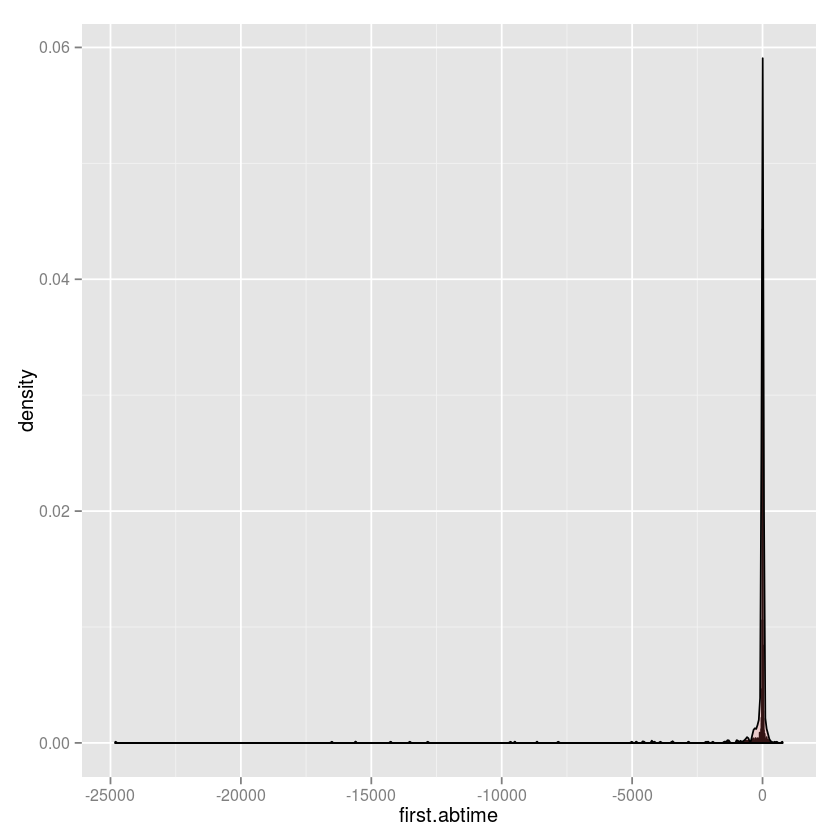

In [9]:
library(ggplot2)
print('density plot of the distribution of first abx timing')
ggplot(abtimes, aes(x=first.abtime)) + 
  geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                 binwidth=10,
                 colour="black", fill="white") +
  geom_density(alpha=.2, fill="#FF6666")

# ggplot(abtimes, aes(x=first.abtime)) +
#   geom_histogram(binwidth=.5, colour="black", fill="white") + xlim(-200, 100)

# ggplot(abtimes, aes(x=first.abtime)) + 
#   geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
#                  binwidth=10,
#                  colour="black", fill="white") +
#   geom_density(alpha=.2, fill="#FF6666") + xlim(-100, 100)



[1] "histogram of the distribution of first abx timing"


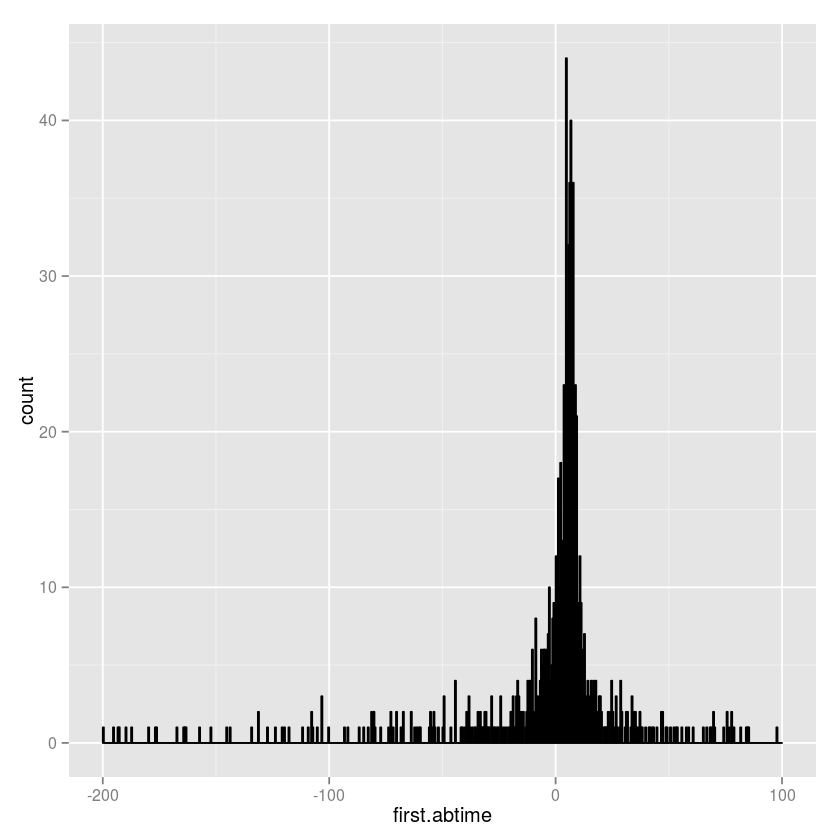

In [10]:
print('histogram of the distribution of first abx timing')

ggplot(abtimes, aes(x=first.abtime)) +
  geom_histogram(binwidth=.5, colour="black", fill="white") + xlim(-200, 100)

[1] "patients without abx after event"


[1] 300

[1] "histograms of distri. of timing of first abx after event"


Warning message:
: Removed 300 rows containing non-finite values (stat_density).

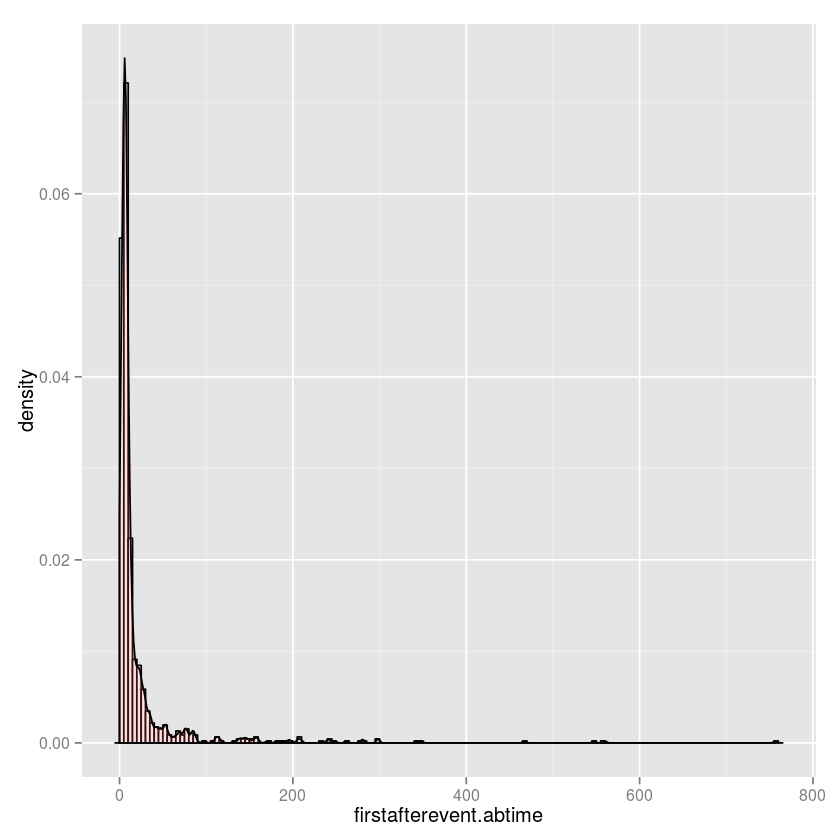

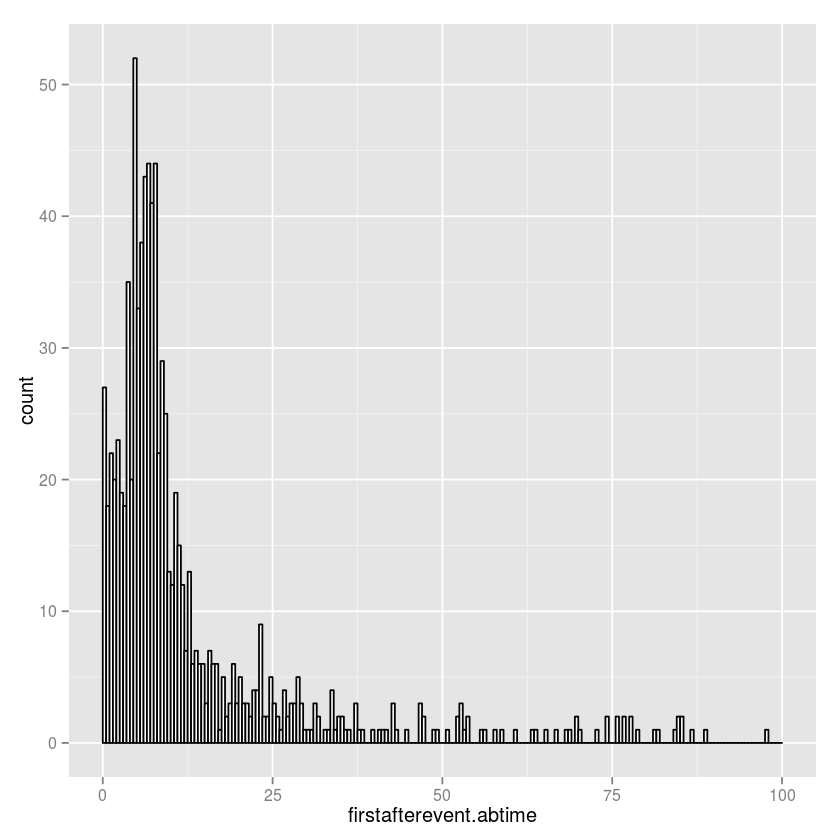

In [11]:
#plot the time of antibiotics after time of event
print('patients without abx after event')
length(abtimes$id[is.na(abtimes$firstafterevent.abtime)]) 
print('histograms of distri. of timing of first abx after event')
ggplot(abtimes, aes(x=firstafterevent.abtime)) + 
  geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                 binwidth=5,
                 colour="black", fill="white") +
  geom_density(alpha=.2, fill="#FF6666")


ggplot(abtimes, aes(x=firstafterevent.abtime)) +
  geom_histogram(binwidth=.5, colour="black", fill="white") + xlim(0, 100)

In [12]:
names(antibiotics4)
antibiotics5 <- antibiotics4[order(antibiotics4$id, antibiotics4$start_time),]
library(plyr)
library(lubridate)

antibiotics5$start_time <- as.POSIXct(as.character(antibiotics5$start_time))
antibiotics5$stop_time <- as.POSIXct(as.character(antibiotics5$stop_time))
antibiotics5$event.time <- as.POSIXct(antibiotics5$event.time)
antibiotics5$clear.time <- as.POSIXct(antibiotics5$clear.time)
antibiotics5$normalize.time <- as.POSIXct(antibiotics5$normalize.time)
str(antibiotics5)
antibiotics5[25:30,]

# # remove the antibiotics given after 10% decrease
# antibiotics5a <- antibiotics5[(is.na(antibiotics5$clear.time)) | ((!is.na(antibiotics5$clear.time)) & difftime(antibiotics5$start_time, antibiotics5$clear.time, unit='hour')<0), ]
# antibiotics5a <- antibiotics5a[!is.na(antibiotics5a$id),]
# length(unique(antibiotics5a$id))

[1] "itemid"           "id"               "start_time"       "stop_time"       
 [5] "event.time"       "clear.time"       "normalize.time"   "lastlactate.time"
 [9] "dftime"           "itemidG"


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here



'data.frame':	8254 obs. of  10 variables:
 $ itemid          : chr  "Vancomycin HCl" "Vancomycin HCl" "Vancomycin HCl" "Ceftazidime" ...
 $ id              : Factor w/ 24951 levels "1000#%#1#%#1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start_time      : POSIXct, format: "2512-01-26 19:00:00" "2512-01-30 16:00:00" ...
 $ stop_time       : POSIXct, format: "2512-01-29 14:00:00" "2512-03-02 10:00:00" ...
 $ event.time      : POSIXct, format: "2512-03-01 15:19:00" "2512-03-01 15:19:00" ...
 $ clear.time      : POSIXct, format: NA NA ...
 $ normalize.time  : POSIXct, format: NA NA ...
 $ lastlactate.time: POSIXct, format: "2512-03-01 15:19:00" "2512-03-01 15:19:00" ...
 $ dftime          :Class 'difftime'  atomic [1:8254] -836 -743 -678 -669 -622 ...
  .. ..- attr(*, "units")= chr "hours"
 $ itemidG         : Factor w/ 10 levels "Cephalosporins",..: 10 10 10 1 1 5 10 3 3 8 ...


,itemid,id,start_time,stop_time,event.time,clear.time,normalize.time,lastlactate.time,dftime,itemidG
2297,Levofloxacin,10019#%#1#%#1,2675-05-29 22:00:00,2675-05-30 10:00:00,2675-05-29 16:07:00,NA,NA,2675-05-30 15:20:00,5.883333 hours,Fluoroquinolones
3633,Metronidazole,10019#%#1#%#1,2675-05-29 23:00:00,2675-05-30 10:00:00,2675-05-29 16:07:00,NA,NA,2675-05-30 15:20:00,6.883333 hours,Others
2590,Levofloxacin,10019#%#1#%#1,2675-05-30 11:00:00,2675-05-30 21:00:00,2675-05-29 16:07:00,NA,NA,2675-05-30 15:20:00,18.88333 hours,Fluoroquinolones
3013,Meropenem,10019#%#1#%#1,2675-05-30 11:00:00,2675-05-30 21:00:00,2675-05-29 16:07:00,NA,NA,2675-05-30 15:20:00,18.88333 hours,Carbapenems
803,CeftAZIDime,10045#%#1#%#1,2579-11-05 13:00:00,2579-11-11 10:00:00,2579-11-05 06:53:00,2579-11-05 08:40:00,2579-11-06 22:54:00,2579-11-10 16:33:00,6.116667 hours,Cephalosporins
1897,Gentamicin,10045#%#1#%#1,2579-11-06 22:00:00,2579-11-07 08:00:00,2579-11-05 06:53:00,2579-11-05 08:40:00,2579-11-06 22:54:00,2579-11-10 16:33:00,39.11667 hours,Aminoglycosides


In [13]:
names(sepsis.time)
sepsis.time$clear.dftime <- difftime(sepsis.time$clear.time, sepsis.time$event.time, unit='hour')
sepsis.time$normalize.dftime <- difftime(sepsis.time$normalize.time, sepsis.time$event.time, unit='hour')
sepsis.time$lastlactate.dftime <- difftime(sepsis.time$lastlactate.time, sepsis.time$event.time, unit='hour')

head(sepsis.time)

[1] "id"               "event.time"       "clear.time"       "normalize.time"  
[5] "lastlactate.time"

,id,event.time,clear.time,normalize.time,lastlactate.time,clear.dftime,normalize.dftime,lastlactate.dftime
1,1000#%#1#%#1,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,NA hours,NA hours,0 hours
2,10019#%#1#%#1,2675-05-29 16:07:00,NA,NA,2675-05-30 15:20:00,NA hours,NA hours,23.21667 hours
3,1003#%#1#%#1,3235-02-14 11:01:00,3235-02-17 06:18:00,NA,3235-02-17 06:18:00,67.28333 hours,NA hours,67.28333 hours
4,10045#%#1#%#1,2579-11-05 06:53:00,2579-11-05 08:40:00,2579-11-06 22:54:00,2579-11-10 16:33:00,1.783333 hours,40.01667 hours,130.6667 hours
5,10061#%#1#%#1,3433-02-11 18:08:00,3433-02-12 08:06:00,3433-02-16 08:01:00,3433-03-02 23:35:00,13.96667 hours,109.8833 hours,461.45 hours
6,10063#%#1#%#1,3413-09-06 21:50:00,3413-09-08 00:10:00,3413-09-08 00:10:00,3413-09-08 01:10:00,26.33333 hours,26.33333 hours,27.33333 hours


In [14]:
#patients given first abx after clearance
sepsis.ab.times <- merge(sepsis.time, abtimes, by.x = 'id', by.y = 'id', all.x = T)
head(sepsis.ab.times)
nrow(sepsis.ab.times)
pts.ab.cleared <- sepsis.ab.times$id[(!is.na(sepsis.ab.times$clear.dftime)) & (!is.na(sepsis.ab.times$first.abtime)) & (sepsis.ab.times$clear.dftime > sepsis.ab.times$first.abtime)]
pts.ab.nocleared <- sepsis.ab.times$id[is.na(sepsis.ab.times$clear.dftime) & (!is.na(sepsis.ab.times$first.abtime))]
pts.ab <- union(pts.ab.cleared, pts.ab.nocleared)
length(pts.ab)

,id,event.time,clear.time,normalize.time,lastlactate.time,clear.dftime,normalize.dftime,lastlactate.dftime,first.abtime,firstafterevent.abtime
1,1000#%#1#%#1,2512-03-01 15:19:00,NA,NA,2512-03-01 15:19:00,NA hours,NA hours,0 hours,-836.3167,2.683333
2,10019#%#1#%#1,2675-05-29 16:07:00,NA,NA,2675-05-30 15:20:00,NA hours,NA hours,23.21667 hours,5.883333,5.883333
3,1003#%#1#%#1,3235-02-14 11:01:00,3235-02-17 06:18:00,NA,3235-02-17 06:18:00,67.28333 hours,NA hours,67.28333 hours,NA,NA
4,10045#%#1#%#1,2579-11-05 06:53:00,2579-11-05 08:40:00,2579-11-06 22:54:00,2579-11-10 16:33:00,1.783333 hours,40.01667 hours,130.6667 hours,6.116667,6.116667
5,10061#%#1#%#1,3433-02-11 18:08:00,3433-02-12 08:06:00,3433-02-16 08:01:00,3433-03-02 23:35:00,13.96667 hours,109.8833 hours,461.45 hours,-28.13333,18.86667
6,10063#%#1#%#1,3413-09-06 21:50:00,3413-09-08 00:10:00,3413-09-08 00:10:00,3413-09-08 01:10:00,26.33333 hours,26.33333 hours,27.33333 hours,5.166667,5.166667


[1] 1221

[1] 634

In [15]:
#patients without any abx during the entire icu stay
pts.0ab <- sepsis.ab.times$id[is.na(sepsis.ab.times$first.abtime)]
length(pts.0ab)

[1] 210

In [16]:
#patients without any abx before lactate clearance but with abx after clearance
pts.0ab.beforeclear <- sepsis.ab.times$id[(!is.na(sepsis.ab.times$clear.dftime)) & (!is.na(sepsis.ab.times$first.abtime)) & (sepsis.ab.times$clear.dftime < sepsis.ab.times$first.abtime)]
length(pts.0ab.beforeclear)

[1] 377

In [17]:
#create dataframe for patients without antibiotics and if has 10% lactate clearance, censor = 1; else 0

lactateclearanceA <- sepsis.ab.times[sepsis.ab.times$id %in% pts.0ab, c(1,6,8,9)]
lactateclearanceA$first.abtime <- 1000
head(lactateclearanceA)

,id,clear.dftime,lastlactate.dftime,first.abtime
3,1003#%#1#%#1,67.28333 hours,67.28333 hours,1000
7,101#%#1#%#1,9.766667 hours,154.0333 hours,1000
10,10160#%#2#%#2,NA hours,37.31667 hours,1000
15,10304#%#1#%#1,10.3 hours,96.05 hours,1000
33,10635#%#14#%#1,10.6 hours,10.6 hours,1000
48,11067#%#1#%#1,0.55 hours,63.06667 hours,1000


In [18]:
lactateclearanceA$censor <- NA
lactateclearanceA$time <- NA
for (i in 1:nrow(lactateclearanceA)) {
  if (is.na(lactateclearanceA$clear.dftime[i])) {
    lactateclearanceA$time[i] <- lactateclearanceA$lastlactate.dftime[i]
    lactateclearanceA$censor[i] <- 0
  }  else {
    lactateclearanceA$time[i] <- lactateclearanceA$clear.dftime[i]
    lactateclearanceA$censor[i] <- 1 
  }
}
lactateclearanceA$drugab <- 0
print('numers of patients without abx: censored vs. cleared')
table(lactateclearanceA$censor)
head(lactateclearanceA)

[1] "numers of patients without abx: censored vs. cleared"



  0   1 
 79 131 

,id,clear.dftime,lastlactate.dftime,first.abtime,censor,time,drugab
3,1003#%#1#%#1,67.28333 hours,67.28333 hours,1000,1,67.28333,0
7,101#%#1#%#1,9.766667 hours,154.0333 hours,1000,1,9.766667,0
10,10160#%#2#%#2,NA hours,37.31667 hours,1000,0,37.31667,0
15,10304#%#1#%#1,10.3 hours,96.05 hours,1000,1,10.3,0
33,10635#%#14#%#1,10.6 hours,10.6 hours,1000,1,10.6,0
48,11067#%#1#%#1,0.55 hours,63.06667 hours,1000,1,0.55,0


In [19]:
#create dataframe for patients with antibiotics before clearance and if has 10% lactate clearance, censor = 1; else 0
lactateclearanceB <- sepsis.ab.times[sepsis.ab.times$id %in% pts.ab, c(1,6,8,9)]

lactateclearanceB$censor <- NA
lactateclearanceB$time <- NA
for (i in 1:nrow(lactateclearanceB)) {
  if (is.na(lactateclearanceB$clear.dftime[i])) {
    lactateclearanceB$time[i] <- lactateclearanceB$lastlactate.dftime[i]
    lactateclearanceB$censor[i] <- 0
  }  else {
    lactateclearanceB$time[i] <- lactateclearanceB$clear.dftime[i]
    lactateclearanceB$censor[i] <- 1   
  }
}
lactateclearanceB$drugab <- 1
print('numers of patients with abx before clearance: censored vs. cleared')
table(lactateclearanceB$censor)
head(lactateclearanceB)

[1] "numers of patients with abx before clearance: censored vs. cleared"



  0   1 
157 477 

,id,clear.dftime,lastlactate.dftime,first.abtime,censor,time,drugab
1,1000#%#1#%#1,NA hours,0 hours,-836.3167,0,0,1
2,10019#%#1#%#1,NA hours,23.21667 hours,5.883333,0,23.21667,1
5,10061#%#1#%#1,13.96667 hours,461.45 hours,-28.13333,1,13.96667,1
6,10063#%#1#%#1,26.33333 hours,27.33333 hours,5.166667,1,26.33333,1
9,10138#%#1#%#1,1.516667 hours,53.83333 hours,1.016667,1,1.516667,1
11,10185#%#1#%#1,39.08333 hours,445.8333 hours,30.75,1,39.08333,1


In [20]:
#create dataframe for patients with antibiotics after clearance and if has 10% lactate clearance, censor = 1; else 0
lactateclearanceC <- sepsis.ab.times[sepsis.ab.times$id %in% pts.0ab.beforeclear, c(1,6,8,9)]
lactateclearanceC$first.abtime <- 2000
lactateclearanceC$censor <- NA
lactateclearanceC$time <- NA
for (i in 1:nrow(lactateclearanceC)) {
  if (is.na(lactateclearanceC$clear.dftime[i])) {
    lactateclearanceC$time[i] <- lactateclearanceC$lastlactate.dftime[i]
    lactateclearanceC$censor[i] <- 0
  }  else {
    lactateclearanceC$time[i] <- lactateclearanceC$clear.dftime[i]
    lactateclearanceC$censor[i] <- 1   
  }
}
lactateclearanceC$drugab <- 2
print('numers of patients with abx after clearance')
nrow(lactateclearanceC)
head(lactateclearanceC)

[1] "numers of patients with abx after clearance"


[1] 377

,id,clear.dftime,lastlactate.dftime,first.abtime,censor,time,drugab
4,10045#%#1#%#1,1.783333 hours,130.6667 hours,2000,1,1.783333,2
8,10126#%#1#%#1,2.2 hours,843.2 hours,2000,1,2.2,2
12,10187#%#1#%#1,5.383333 hours,346.5833 hours,2000,1,5.383333,2
16,10306#%#1#%#1,2.8 hours,36.35 hours,2000,1,2.8,2
18,10315#%#2#%#1,9.016667 hours,21.76667 hours,2000,1,9.016667,2
20,10356#%#1#%#1,2.533333 hours,15.75 hours,2000,1,2.533333,2


In [21]:
lactateclearance.ab <- rbind(lactateclearanceA, lactateclearanceB)
lactateclearance.ab <- rbind(lactateclearance.ab, lactateclearanceC)
head(lactateclearance.ab)

,id,clear.dftime,lastlactate.dftime,first.abtime,censor,time,drugab
3,1003#%#1#%#1,67.28333 hours,67.28333 hours,1000,1,67.28333,0
7,101#%#1#%#1,9.766667 hours,154.0333 hours,1000,1,9.766667,0
10,10160#%#2#%#2,NA hours,37.31667 hours,1000,0,37.31667,0
15,10304#%#1#%#1,10.3 hours,96.05 hours,1000,1,10.3,0
33,10635#%#14#%#1,10.6 hours,10.6 hours,1000,1,10.6,0
48,11067#%#1#%#1,0.55 hours,63.06667 hours,1000,1,0.55,0


[1] 1221

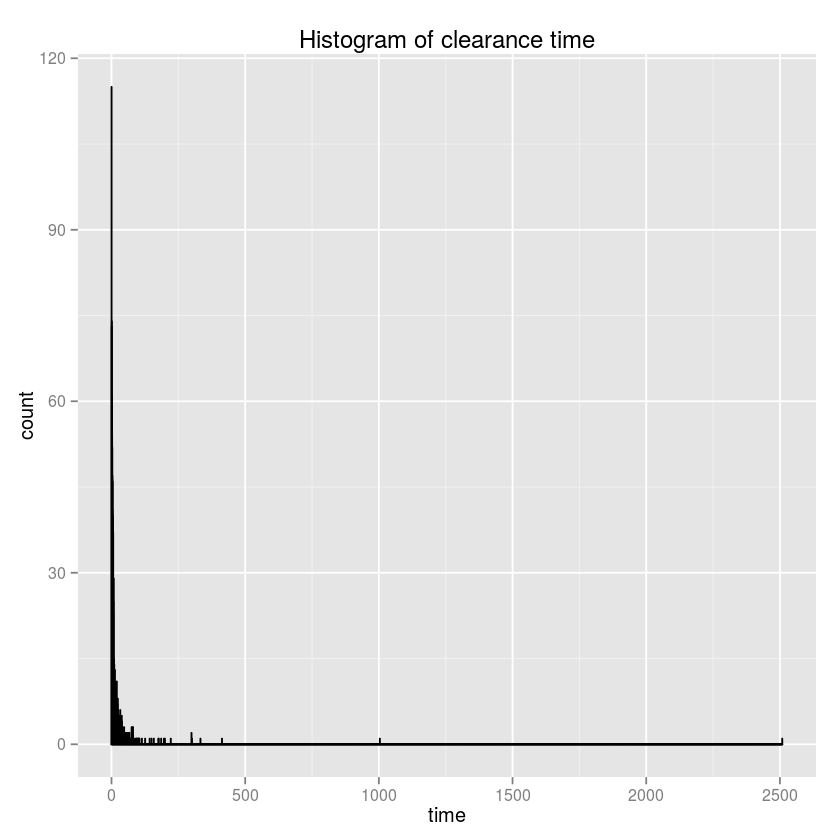

In [22]:
ggplot(lactateclearance.ab, aes(x=time)) +
  geom_histogram(binwidth=.5, colour="black", fill="white") +ggtitle('Histogram of clearance time')

length(lactateclearance.ab$id)

In [23]:
#remove outliers
lactateclearanceABC.abtime <- lactateclearance.ab[(lactateclearance.ab$time) < 200, ]
lactateclearanceABC.abtime <- lactateclearanceABC.abtime[!is.na(lactateclearanceABC.abtime$id),]
nrow(lactateclearanceABC.abtime)
save(lactateclearanceABC.abtime, file = 'lactateclearanceABC.abtime.RData')

[1] 1192

Call: survfit(formula = Surv(time, censor) ~ firstab.time, data = lactateclearanceABC.abtime)

   736 observations deleted due to missingness 
                             n events median 0.95LCL 0.95UCL
firstab.time=[0,3)          69     57   7.93    6.58    12.6
firstab.time=[3,6)          93     80  11.33    8.12    16.4
firstab.time=[6,900)       107     68  27.85   24.57    39.1
firstab.time=[900,1.5e+03) 187    130   8.32    5.48    13.0


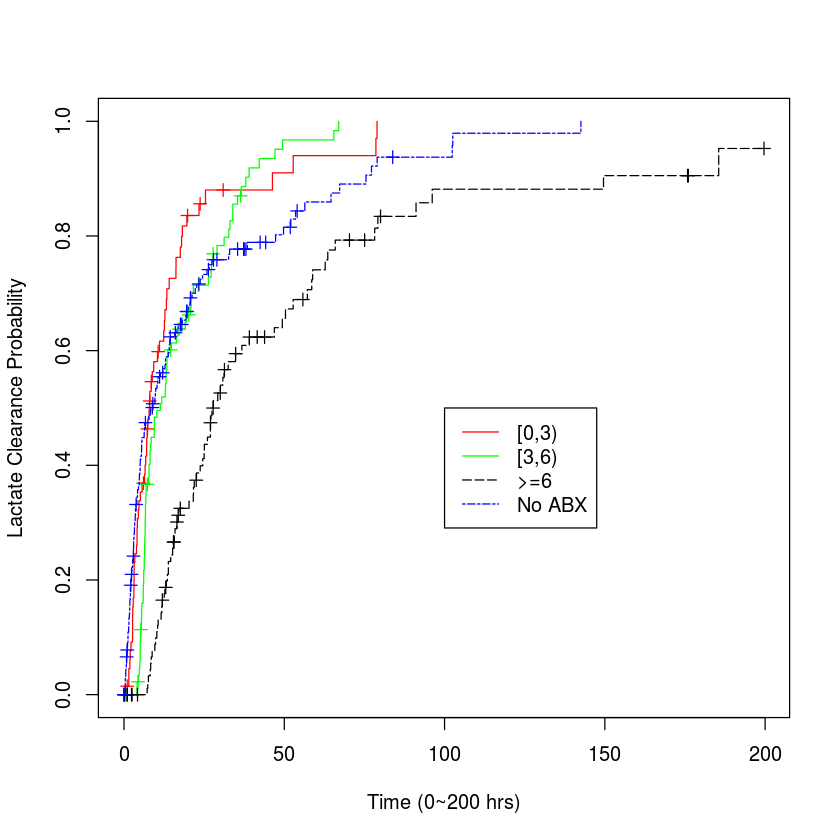

In [24]:
#survival analysis; Kaplan-Merier Curves
library(survival)
firstab.time <- cut(lactateclearanceABC.abtime$first.abtime, c(0, 3, 6, 900, 1500), right = F)
survab.time <- survfit(Surv(time, censor) ~ firstab.time, data = lactateclearanceABC.abtime)
print(survab.time)
plot(survab.time, lty=c(1,1,5,6), col = c('red', 'green', 'black', 'blue'), xlab="Time (0~200 hrs)", ylab="Lactate Clearance Probability", fun = 'event')
legend(100, 0.5, c('[0,3)','[3,6)', '>=6', 'No ABX'), lty=c(1,1,5,6), col = c('red', 'green', 'black', 'blue')) 

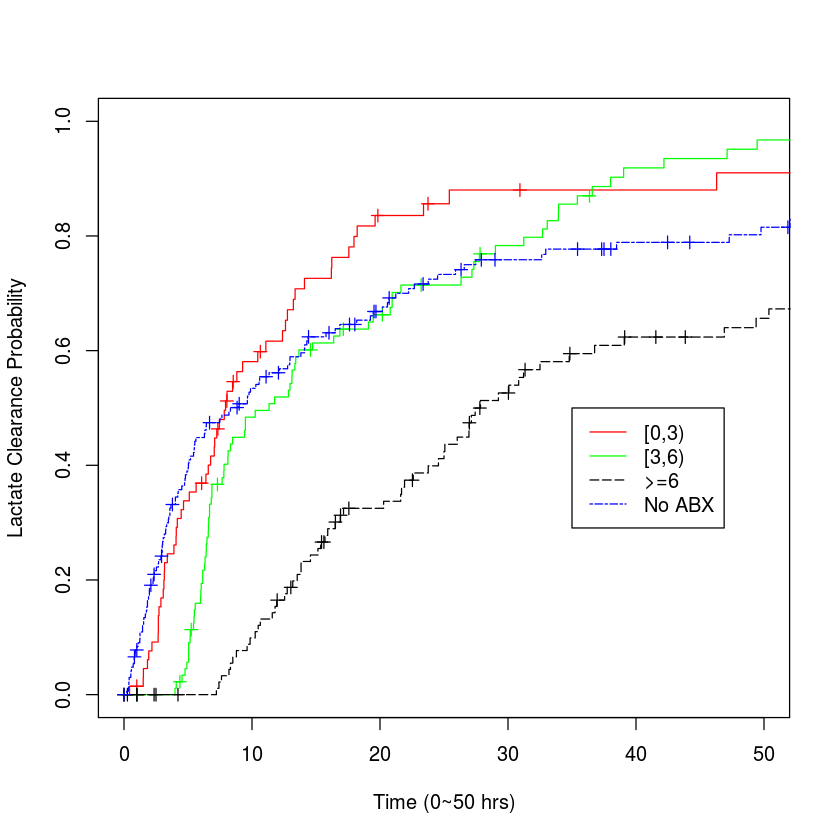

In [25]:
plot(survab.time, lty=c(1,1,5,6), col = c('red', 'green', 'black', 'blue'), xlab="Time (0~50 hrs)", ylab="Lactate Clearance Probability", xlim=c(0,50), fun = 'event')
legend(35, 0.5, c('[0,3)','[3,6)', '>=6', 'No ABX' ), lty=c(1,1,5,6), col = c('red', 'green', 'black', 'blue')) 


In [26]:
survdiff(Surv(time, censor) ~ firstab.time, data = lactateclearanceABC.abtime)

Call:
survdiff(formula = Surv(time, censor) ~ firstab.time, data = lactateclearanceABC.abtime)

n=456, 736 observations deleted due to missingness.

                             N Observed Expected (O-E)^2/E (O-E)^2/V
firstab.time=[0,3)          69       57     36.6     11.43     13.06
firstab.time=[3,6)          93       80     66.3      2.83      3.62
firstab.time=[6,900)       107       68    124.3     25.53     42.78
firstab.time=[900,1.5e+03) 187      130    107.8      4.57      6.79

 Chisq= 46.9  on 3 degrees of freedom, p= 3.62e-10 

In [27]:
survdiff(Surv(time, censor) ~ firstab.time, data = lactateclearanceABC.abtime, rho=1) 

Call:
survdiff(formula = Surv(time, censor) ~ firstab.time, data = lactateclearanceABC.abtime, 
    rho = 1)

n=456, 736 observations deleted due to missingness.

                             N Observed Expected (O-E)^2/E (O-E)^2/V
firstab.time=[0,3)          69     37.0     24.1   6.91568  10.78561
firstab.time=[3,6)          93     42.7     42.3   0.00505   0.00917
firstab.time=[6,900)       107     24.1     61.8  23.05862  52.23647
firstab.time=[900,1.5e+03) 187     86.3     62.0   9.59587  20.53536

 Chisq= 59.8  on 3 degrees of freedom, p= 6.56e-13 

In [85]:
print('rho= is an option of the survdiff function for differentially weighting survival times. The default setting rho=0 carries out the ordinary log-rank test, while rho=1 carries out the Gehan-Wilcoxon modification of the log-rank test. The conclusions are the same for both versions of the test but notice that the value of the test statistic is much larger for the ordinary log-rank test indicating that late survival time differences are larger than early survival time differences.')

[1] "rho= is an option of the survdiff function for differentially weighting survival times. The default setting rho=0 carries out the ordinary log-rank test, while rho=1 carries out the Gehan-Wilcoxon modification of the log-rank test. The conclusions are the same for both versions of the test but notice that the value of the test statistic is much larger for the ordinary log-rank test indicating that late survival time differences are larger than early survival time differences."


In [53]:
print("analysis: how ofen are lactates checked after the initial lactate measurement?")
# patients with at least one lactate > 4 and has infection and organ dysfunction: data_df2.2
# select the patients in the first three groups according to their first ABX timing:

print("patients had antibiotics before lactate clearance:")
data_df2.3b <- data_df2.2[data_df2.2$id %in% lactateclearanceB$id, ] 
head(data_df2.3b)
length(lactateclearanceB$id)
write.csv(data_df2.3b, 'data_df2.3b.csv', row.names = F)

print("patients without antibiotics:")
data_df2.3a <- data_df2.2[data_df2.2$id %in% lactateclearanceA$id, ] 
head(data_df2.3a)
length(lactateclearanceA$id)
write.csv(data_df2.3a, 'data_df2.3a.csv', row.names = F)

print("patients had antibiotics after lactate clearance:")
data_df2.3c <- data_df2.2[data_df2.2$id %in% lactateclearanceC$id, ] 
head(data_df2.3c)
length(lactateclearanceC$id)
write.csv(data_df2.3c, 'data_df2.3c.csv', row.names = F)


[1] "analysis: how ofen are lactates checked after the initial lactate measurement?"
[1] "patients had antibiotics before lactate clearance:"


,id,charttime,itemid,valuenum
169981,1000#%#1#%#1,2512-01-28 18:59:00,50010,0.9
5348432,1000#%#1#%#1,2512-01-28 18:59:00,818,0.9
170182,1000#%#1#%#1,2512-02-04 07:42:00,50010,1.1
5348962,1000#%#1#%#1,2512-02-04 07:42:00,818,1.1
170230,1000#%#1#%#1,2512-02-05 09:45:00,50010,1.75
5349053,1000#%#1#%#1,2512-02-05 09:45:00,818,1.75


[1] 634

[1] "patients without antibiotics:"


,id,charttime,itemid,valuenum
171107,1003#%#1#%#1,3235-02-14 06:48:00,50010,3.8
5351115,1003#%#1#%#1,3235-02-14 06:48:00,818,3.8
171168,1003#%#1#%#1,3235-02-14 16:01:00,50010,5.4
5351149,1003#%#1#%#1,3235-02-14 16:01:00,818,5.4
171224,1003#%#1#%#1,3235-02-14 22:04:00,50010,6.7
5351171,1003#%#1#%#1,3235-02-14 22:04:00,818,6.7


[1] 210

[1] "patients had antibiotics after lactate clearance:"


,id,charttime,itemid,valuenum
1593983,10045#%#1#%#1,2579-11-04 22:12:00,50010,1.8
8095943,10045#%#1#%#1,2579-11-05 09:36:00,818,3.1
8095944,10045#%#1#%#1,2579-11-05 09:36:00,1531,3.1
1594011,10045#%#1#%#1,2579-11-05 10:36:00,50010,3.1
8095950,10045#%#1#%#1,2579-11-05 10:53:00,818,4.3
8095951,10045#%#1#%#1,2579-11-05 10:53:00,1531,4.3


[1] 377

'data.frame':	27706 obs. of  4 variables:
 $ id       : Factor w/ 24951 levels "10000#%#1#%#1",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ charttime: POSIXct, format: "2512-01-28 18:59:00" "2512-01-28 18:59:00" ...
 $ itemid   : num  50010 818 50010 818 50010 ...
 $ valuenum : num  0.9 0.9 1.1 1.1 1.75 1.75 2 2 2 2 ...


ERROR: Error in `$<-.data.frame`(`*tmp*`, "charttime2", value = structure(c(0, : replacement has 249354 rows, data has 27706


,id,charttime,itemid,valuenum,charttime2
169981,1000#%#1#%#1,2512-01-28 18:59:00,50010,0.9,2512-01-28 18:59:00
5348432,1000#%#1#%#1,2512-01-28 18:59:00,818,0.9,2512-01-28 18:59:00
170182,1000#%#1#%#1,2512-02-04 07:42:00,50010,1.1,2512-02-04 07:42:00
5348962,1000#%#1#%#1,2512-02-04 07:42:00,818,1.1,2512-02-04 07:42:00
170230,1000#%#1#%#1,2512-02-05 09:45:00,50010,1.75,2512-02-05 09:45:00
5349053,1000#%#1#%#1,2512-02-05 09:45:00,818,1.75,2512-02-05 09:45:00
